### torchvision Pretrained Models

* **torchvision** provides many state-of-the-art CNN models, and these models come with pre-trained weights learned on the **ImageNet** dataset.
* Using these pretrained models, you can easily build your own **custom models** by fine-tuning or modifying them.
* You can check the full list of available models at:
  👉 [https://pytorch.org/vision/main/models.html](https://pytorch.org/vision/main/models.html)


### Using the models Module in torchvision


In [1]:
import torch
import torchvision
from torchvision import models

print(torchvision.__version__)

# List of models available in the current torchvision version
models.list_models()  # You can filter the model list using include or exclude


0.21.0+cu124


['alexnet',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'deeplabv3_mobilenet_v3_large',
 'deeplabv3_resnet101',
 'deeplabv3_resnet50',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'efficientnet_v2_l',
 'efficientnet_v2_m',
 'efficientnet_v2_s',
 'fasterrcnn_mobilenet_v3_large_320_fpn',
 'fasterrcnn_mobilenet_v3_large_fpn',
 'fasterrcnn_resnet50_fpn',
 'fasterrcnn_resnet50_fpn_v2',
 'fcn_resnet101',
 'fcn_resnet50',
 'fcos_resnet50_fpn',
 'googlenet',
 'inception_v3',
 'keypointrcnn_resnet50_fpn',
 'lraspp_mobilenet_v3_large',
 'maskrcnn_resnet50_fpn',
 'maskrcnn_resnet50_fpn_v2',
 'maxvit_t',
 'mc3_18',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet_v2',
 'mobilenet_v3_large',
 'mobilenet_v3_small',
 'mvit_v1_b',
 'mvit_v2_s',
 'quantized_googlenet',
 '

In [2]:
models.get_model_weights(name='resnet50')

<enum 'ResNet50_Weights'>

In [3]:
# Check the types of weights available for a specific model. 
# A single model can have multiple weights depending on the training dataset and training method. 
weights_enum = models.get_model_weights(name='resnet50')  # 'efficientnet_b1'
print([weight for weight in weights_enum])


[ResNet50_Weights.IMAGENET1K_V1, ResNet50_Weights.IMAGENET1K_V2]


In [4]:
# Print the list of weights available for all models
all_models = models.list_models()
for model_name in all_models:
    weights = models.get_model_weights(name=model_name)
    if weights:
        print(f"Model: {model_name}, Weights: {[weight for weight in weights]}")


Model: alexnet, Weights: [AlexNet_Weights.IMAGENET1K_V1]
Model: convnext_base, Weights: [ConvNeXt_Base_Weights.IMAGENET1K_V1]
Model: convnext_large, Weights: [ConvNeXt_Large_Weights.IMAGENET1K_V1]
Model: convnext_small, Weights: [ConvNeXt_Small_Weights.IMAGENET1K_V1]
Model: convnext_tiny, Weights: [ConvNeXt_Tiny_Weights.IMAGENET1K_V1]
Model: deeplabv3_mobilenet_v3_large, Weights: [DeepLabV3_MobileNet_V3_Large_Weights.COCO_WITH_VOC_LABELS_V1]
Model: deeplabv3_resnet101, Weights: [DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1]
Model: deeplabv3_resnet50, Weights: [DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1]
Model: densenet121, Weights: [DenseNet121_Weights.IMAGENET1K_V1]
Model: densenet161, Weights: [DenseNet161_Weights.IMAGENET1K_V1]
Model: densenet169, Weights: [DenseNet169_Weights.IMAGENET1K_V1]
Model: densenet201, Weights: [DenseNet201_Weights.IMAGENET1K_V1]
Model: efficientnet_b0, Weights: [EfficientNet_B0_Weights.IMAGENET1K_V1]
Model: efficientnet_b1, Weights: [Efficie

### Loading Pretrained Models in torchvision

* In older versions, you could load pretrained models using `models.model_name(pretrained=True)`.
* In the current version, even for the same model, you must specify the pretrained weights when creating it.


In [5]:
# In older versions, pretrained=True could be used to load models with pretrained weights,
# but since torchvision 0.13 this has been deprecated. 
model_temp = models.vgg19_bn(pretrained=True)  # pretrained=False does not load pretrained weights. 
# Examples: resnet50, efficientnet-b0, resnext101_32x8d
print(model_temp)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth
100%|██████████| 548M/548M [00:06<00:00, 92.4MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [6]:
print([weight for weight in models.get_model_weights('vgg19_bn')])

[VGG19_BN_Weights.IMAGENET1K_V1]


In [7]:
# from torchvision.models import VGG19_Weights, VGG19_BN_Weights

# batch normalization is applied
print([weight for weight in models.get_model_weights('vgg19_bn')])
vgg_model = models.vgg19_bn(weights=models.VGG19_BN_Weights.IMAGENET1K_V1) #weights='IMAGENET1K_V1' 또는 'DEFAULT'
print(vgg_model)

[VGG19_BN_Weights.IMAGENET1K_V1]
VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode

In [8]:
from torchinfo import summary

summary(model=vgg_model, input_size=(1, 3, 418, 418), #(1, 3, 32, 32)
        col_names=['input_size', 'output_size', 'num_params'], 
        row_settings=['var_names'])

Layer (type (var_name))                  Input Shape               Output Shape              Param #
VGG (VGG)                                [1, 3, 418, 418]          [1, 1000]                 --
├─Sequential (features)                  [1, 3, 418, 418]          [1, 512, 13, 13]          --
│    └─Conv2d (0)                        [1, 3, 418, 418]          [1, 64, 418, 418]         1,792
│    └─BatchNorm2d (1)                   [1, 64, 418, 418]         [1, 64, 418, 418]         128
│    └─ReLU (2)                          [1, 64, 418, 418]         [1, 64, 418, 418]         --
│    └─Conv2d (3)                        [1, 64, 418, 418]         [1, 64, 418, 418]         36,928
│    └─BatchNorm2d (4)                   [1, 64, 418, 418]         [1, 64, 418, 418]         128
│    └─ReLU (5)                          [1, 64, 418, 418]         [1, 64, 418, 418]         --
│    └─MaxPool2d (6)                     [1, 64, 418, 418]         [1, 64, 209, 209]         --
│    └─Conv2d (7)         

In [9]:
print([weight for weight in models.get_model_weights('resnet50')])
resnet_model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)#weights='IMAGENET1K_V2' 또는 'DEFAULT'
print(resnet_model)

[ResNet50_Weights.IMAGENET1K_V1, ResNet50_Weights.IMAGENET1K_V2]


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 192MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Creating a Custom Model by Modifying the Classification Layer

* Most CNN classification models in **torchvision** are designed to classify **ImageNet**, which has 1000 classes. Therefore, the final classification layer outputs 1000 units.
* For custom datasets with a different number of classes, the last classification layer must be customized so that its output size matches the number of classes.
* In torchvision models, the final classifier layer (or block) is usually named **`classifier`** or **`fc`**. You can directly replace this variable with your own custom classifier layer.
* Therefore, you should always check the model structure (by printing the model or using `torchinfo.summary`) to confirm how the classification block is defined.


In [10]:
vgg_model.classifier # resnet_model.fc
# resnet_model.fc

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
NUM_CLASSES = 10

# You can directly redefine the model's final classifier.
vgg_model.classifier = nn.Sequential(
      nn.Linear(in_features=25088, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5, inplace=False),
      nn.Linear(in_features=4096, out_features=4096, bias=True),
      nn.ReLU(inplace=True),
      nn.Dropout(p=0.5, inplace=False), 
      nn.Linear(in_features=4096, out_features=NUM_CLASSES, bias=True)
)

# Redefine Sequential
# vgg_model.classifier = nn.Sequential(
#     nn.Linear(in_features=25088, out_features=4096, bias=True),
#     nn.ReLU(inplace=True),
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(in_features=4096, out_features=500, bias=True),
#     nn.ReLU(inplace=True),
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(in_features=500, out_features=NUM_CLASSES, bias=True)
# )

print(vgg_model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [12]:
vgg_model.classifier[6]

Linear(in_features=4096, out_features=10, bias=True)

In [13]:
NUM_CLASSES = 10
# Change only the final layer inside Sequential.
# vgg_model.classifier[6] = nn.Linear(in_features=4096, out_features=NUM_CLASSES)

# Typically, it's better to directly retrieve the in_features value from the final layer 
# and use it to create the new layer.
num_in_features = vgg_model.classifier[6].in_features
vgg_model.classifier[6] = nn.Linear(in_features=num_in_features, out_features=NUM_CLASSES)

print(vgg_model)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [14]:
# In the case of ResNet, the final classifier variable is named `fc`. 
# Replace it with a Linear layer where out_features = 10.
num_in_features = resnet_model.fc.in_features
resnet_model.fc = nn.Linear(in_features=num_in_features, out_features=NUM_CLASSES)

# resnet_model.fc = nn.Linear(in_features=2048, out_features=10, bias=True)
print(resnet_model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [15]:
# Or completely redefine the final layer structure
resnet_model.fc = nn.Sequential(
                    nn.Dropout(0.5),
                    nn.Linear(in_features=2048, out_features=512),
                    nn.ReLU(),
                    nn.Dropout(0.3),
                    nn.Linear(in_features=512, out_features=128),
                    nn.ReLU(),
                    nn.Dropout(0.2),
                    nn.Linear(in_features=128, out_features=NUM_CLASSES)
)
print(resnet_model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Checking the Default Transforms Applied to a Pretrained Model (Weights)

* Call the `transforms()` method on the **Weights** object to see the default preprocessing transforms that are applied.
* These transforms typically include **resize, crop, normalization, and tensor conversion**, which match the requirements of the pretrained model.
* When running inference with a pretrained model, you can use these transforms to make sure your input images are processed into the correct **size and normalization range** expected by the model.


In [16]:
from torchvision import models

resnet_weights = models.ResNet50_Weights.IMAGENET1K_V2# or ResNet50_Weights.DEFAULT
resnet_transforms = resnet_weights.transforms()

print(resnet_transforms)

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)


### Performing a Dog vs. Cat Classification Model Based on a Pretrained Model


#### Create Custom Model function

In [17]:
import torch
import torch.nn as nn
from torchvision import models

def create_vgg_model(model_name, num_classes=10):
    model = None
    if model_name == 'vgg16_bn':
        model = models.vgg16_bn(weights=models.VGG16_BN_Weights.IMAGENET1K_V1)
    elif model_name == 'vgg19_bn':
        model = models.vgg19_bn(weights=models.VGG19_BN_Weights.IMAGENET1K_V1)
    
    num_in_features = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(in_features=num_in_features, out_features=num_classes)

    return model

def create_resnet_model(model_name, num_classes=10):
    model = None
    if model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
    elif model_name == 'resnet101':
        model = models.resnet101(weights=models.ResNet101_Weights.IMAGENET1K_V2)
    
    num_in_features = model.fc.in_features
    model.fc = nn.Linear(in_features=num_in_features, out_features=num_classes)

    return model
    
resnet_model = create_resnet_model('resnet50', num_classes=2) #resnet50, resnet101
print(resnet_model)

# summary(model=resnet_model, input_size=(1, 3, 224, 224), #(1, 3, 64, 64)
#         col_names=['input_size', 'output_size', 'num_params'], 
#         row_settings=['var_names'])

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

### Create cat and dog dataset dataloader

In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split

paths = [] # List of image file paths
dataset_gubuns = [] # List for train/test splits
label_gubuns = [] # List for dog/cat labels

# Use os.walk() to traverse all subdirectories under a specific directory.
# All files with a .jpg extension under the cat-and-dog directory are image files.
# Under cat-and-dog, there are /train/ and /test/ subdirectories (containing training and testing images).
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Some files in this directory are not image files.
        if '.jpg' in filename:
            # Assign the absolute file path to the variable file_path.
            file_path = dirname+'/'+ filename
            paths.append(file_path)
            # If the absolute path contains training_set or test_set, classify the dataset as 'train' or 'test'.
            if '/training_set/' in file_path:
                dataset_gubuns.append('train')  
            elif '/test_set/' in file_path:
                dataset_gubuns.append('test')
            else: dataset_gubuns.append('N/A')
            
            # If 'dogs' is in the file path, it’s a dog image; if 'cats' is in the path, it’s a cat image.
            if 'dogs' in file_path:
                label_gubuns.append('DOG')
            elif 'cats' in file_path:
                label_gubuns.append('CAT')
            else: label_gubuns.append('N/A')

# Create DataFrame metadata.
data_df = pd.DataFrame({'path':paths, 
                        'dataset':dataset_gubuns, 
                        'label':label_gubuns})

# Convert target values to 0, 1
label_mapping = {'DOG': 0, 'CAT': 1}
data_df['target'] = data_df['label'].map(label_mapping)

# Create train and test metadata DataFrames from the entire dataset.
train_df = data_df[data_df['dataset']=='train']
test_df = data_df[data_df['dataset']=='test']

# Split the original training DataFrame into training and validation sets. 85% train, 15% validation.
tr_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df['target'], random_state=2025)

print(data_df.shape, train_df.shape, tr_df.shape, val_df.shape)


(10028, 4) (8005, 4) (6804, 4) (1201, 4)


In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms as T
from PIL import Image

class CnD_Dataset(Dataset):
    # Takes in image file list, target list, transforms, and other arguments needed for processing images and targets
    def __init__(self, image_paths, targets=None, transform=None):
        self.image_paths = image_paths
        self.targets = targets
        self.transform = transform
    
    # Returns the total number of items
    def __len__(self):
        return len(self.image_paths)
        
    # Returns a single image and label as tensors based on the specified index
    def __getitem__(self, idx):    
        # Load the image using PIL and return a PIL Image object
        pil_image = Image.open(self.image_paths[idx])
        # Typically transform is not None (at least Tensor conversion is applied)
        image = self.transform(pil_image)

        if self.targets is not None:
            # Convert the individual target value to a tensor
            target = torch.tensor(self.targets[idx])
            return image, target
        # For test data, targets may not be provided, so handle this case
        else:
            return image


In [20]:
from torch.utils.data import DataLoader
from torchvision import transforms as T

BATCH_SIZE = 16
IMG_SIZE = 224
IMG_MEANS = [0.485, 0.456, 0.406] 
IMG_STD = [0.229, 0.224, 0.225] 

def create_tr_val_loader(tr_df, val_df, transform):
    tr_dataset = CnD_Dataset(image_paths=tr_df['path'].to_list(), 
                            targets=tr_df['target'].to_list(), transform=transform)
    val_dataset = CnD_Dataset(image_paths=val_df['path'].to_list(), 
                            targets=val_df['target'].to_list(), transform=transform)
    tr_loader = DataLoader(tr_dataset, batch_size = BATCH_SIZE, shuffle=True, num_workers=4, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=2*BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

    return tr_loader, val_loader

transform_01 = T.Compose([
            T.Resize(size=(IMG_SIZE, IMG_SIZE)),
            T.ToTensor(), T.Normalize(mean=IMG_MEANS, std=IMG_STD)
])

tr_loader, val_loader = create_tr_val_loader(tr_df=tr_df, val_df=val_df, transform=transform_01)

#### Trainer Class

In [21]:
from tqdm import tqdm
import torch.nn.functional as F

class Trainer:
    def __init__(self, model, loss_fn, optimizer, train_loader, val_loader, scheduler=None, device=None):
        self.model = model.to(device)
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_loader = train_loader
        self.val_loader = val_loader
        self.scheduler = scheduler
        self.device = device
        self.current_lr = self.optimizer.param_groups[0]['lr']

    def train_epoch(self, epoch):
        self.model.train()

        accu_loss = 0.0
        running_avg_loss = 0.0
        num_total = 0.0
        accu_num_correct = 0.0
        accuracy = 0.0
        with tqdm(total=len(self.train_loader), desc=f"Epoch {epoch+1} [Training..]", leave=True) as progress_bar:
            for batch_idx, (inputs, targets) in enumerate(self.train_loader):
                inputs = inputs.to(self.device)
                targets = targets.to(self.device)

                outputs = self.model(inputs)
                loss = self.loss_fn(outputs, targets)

                self.optimizer.zero_grad()
                loss.backward()
                self.optimizer.step()

                accu_loss += loss.item()
                running_avg_loss = accu_loss /(batch_idx + 1)

                num_correct = (outputs.argmax(-1) == targets).sum().item()
                num_total += inputs.shape[0]
                accu_num_correct += num_correct
                accuracy = accu_num_correct / num_total

                progress_bar.update(1)
                if batch_idx % 20 == 0 or (batch_idx + 1) == progress_bar.total:  
                    progress_bar.set_postfix({"Loss": running_avg_loss,
                                              "Accuracy": accuracy})

        if not isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            self.scheduler.step()
            self.current_lr = self.scheduler.get_last_lr()[0]

        return running_avg_loss, accuracy

    def validate_epoch(self, epoch):
        if not self.val_loader:
            return None

        self.model.eval()

        accu_loss = 0
        running_avg_loss = 0
        num_total = 0.0
        accu_num_correct = 0.0
        accuracy = 0.0
        
        with tqdm(total=len(self.val_loader), desc=f"Epoch {epoch+1} [Validating]", leave=True) as progress_bar:
            with torch.no_grad():
                for batch_idx, (inputs, targets) in enumerate(self.val_loader):
                    inputs = inputs.to(self.device)
                    targets = targets.to(self.device)

                    outputs = self.model(inputs)

                    loss = self.loss_fn(outputs, targets)
                    accu_loss += loss.item()
                    running_avg_loss = accu_loss /(batch_idx + 1)

                    num_correct = (outputs.argmax(-1) == targets).sum().item()
                    num_total += inputs.shape[0]
                    accu_num_correct += num_correct
                    accuracy = accu_num_correct / num_total

                    progress_bar.update(1)
                    if batch_idx % 20 == 0 or (batch_idx + 1) == progress_bar.total:  
                        progress_bar.set_postfix({"Loss": running_avg_loss,
                                                  "Accuracy":accuracy})
        if isinstance(self.scheduler, torch.optim.lr_scheduler.ReduceLROnPlateau):
            self.scheduler.step(running_avg_loss)
            self.current_lr = self.scheduler.get_last_lr()[0]

        return running_avg_loss, accuracy

    def fit(self, epochs):
        history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': [], 'lr': []}
        for epoch in range(epochs):
            train_loss, train_acc = self.train_epoch(epoch)
            val_loss, val_acc = self.validate_epoch(epoch)
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f} Train Accuracy: {train_acc:.4f}",
                  f", Val Loss: {val_loss:.4f} Val Accuracy: {val_acc:.4f}" if val_loss is not None else "",
                  f", Current lr:{self.current_lr:.6f}")
            history['train_loss'].append(train_loss); history['train_acc'].append(train_acc)
            history['val_loss'].append(val_loss); history['val_acc'].append(val_acc)
            history['lr'].append(self.current_lr)

        return history

    def get_trained_model(self):
        return self.model

In [22]:
import torch
import torch.nn as nn
from torch.optim import SGD, Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

NUM_INPUT_CHANNELS = 3
NUM_CLASSES = 2

model = create_resnet_model('resnet50', num_classes=NUM_CLASSES) #resnet50, resnet101
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
optimizer = Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
scheduler = ReduceLROnPlateau(
            optimizer=optimizer, mode='min', factor=0.5, patience=3, threshold=0.01, min_lr=0.00001)

trainer = Trainer(model=model, loss_fn=loss_fn, optimizer=optimizer,
       train_loader=tr_loader, val_loader=val_loader, scheduler=scheduler, device=device)
history = trainer.fit(30)

Epoch 1 [Validating]: 100%|██████████| 38/38 [00:03<00:00, 11.13it/s, Loss=0.167, Accuracy=0.941]


Epoch 1/30, Train Loss: 0.2539 Train Accuracy: 0.9021 , Val Loss: 0.1671 Val Accuracy: 0.9409 , Current lr:0.001000


Epoch 2 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.95it/s, Loss=0.157, Accuracy=0.938]


Epoch 2/30, Train Loss: 0.1772 Train Accuracy: 0.9283 , Val Loss: 0.1566 Val Accuracy: 0.9384 , Current lr:0.001000


Epoch 3 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.01it/s, Loss=0.113, Accuracy=0.961]


Epoch 3/30, Train Loss: 0.1362 Train Accuracy: 0.9455 , Val Loss: 0.1130 Val Accuracy: 0.9609 , Current lr:0.001000


Epoch 4 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.96it/s, Loss=0.173, Accuracy=0.921]


Epoch 4/30, Train Loss: 0.1360 Train Accuracy: 0.9459 , Val Loss: 0.1732 Val Accuracy: 0.9209 , Current lr:0.001000


Epoch 5 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.94it/s, Loss=0.167, Accuracy=0.938]


Epoch 5/30, Train Loss: 0.1035 Train Accuracy: 0.9581 , Val Loss: 0.1667 Val Accuracy: 0.9384 , Current lr:0.001000


Epoch 6 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.53it/s, Loss=0.125, Accuracy=0.962]


Epoch 6/30, Train Loss: 0.0912 Train Accuracy: 0.9616 , Val Loss: 0.1247 Val Accuracy: 0.9617 , Current lr:0.001000


Epoch 7 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.85it/s, Loss=0.121, Accuracy=0.953]


Epoch 7/30, Train Loss: 0.1002 Train Accuracy: 0.9599 , Val Loss: 0.1206 Val Accuracy: 0.9525 , Current lr:0.000500


Epoch 8 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.82it/s, Loss=0.089, Accuracy=0.97]


Epoch 8/30, Train Loss: 0.0376 Train Accuracy: 0.9872 , Val Loss: 0.0890 Val Accuracy: 0.9700 , Current lr:0.000500


Epoch 9 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.86it/s, Loss=0.112, Accuracy=0.967]


Epoch 9/30, Train Loss: 0.0118 Train Accuracy: 0.9968 , Val Loss: 0.1115 Val Accuracy: 0.9667 , Current lr:0.000500


Epoch 10 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.54it/s, Loss=0.144, Accuracy=0.962]


Epoch 10/30, Train Loss: 0.0320 Train Accuracy: 0.9903 , Val Loss: 0.1444 Val Accuracy: 0.9617 , Current lr:0.000500


Epoch 11 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.01it/s, Loss=0.106, Accuracy=0.966]


Epoch 11/30, Train Loss: 0.0213 Train Accuracy: 0.9929 , Val Loss: 0.1062 Val Accuracy: 0.9659 , Current lr:0.000500


Epoch 12 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.13it/s, Loss=0.133, Accuracy=0.96]


Epoch 12/30, Train Loss: 0.0363 Train Accuracy: 0.9871 , Val Loss: 0.1328 Val Accuracy: 0.9600 , Current lr:0.000250


Epoch 13 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.03it/s, Loss=0.0956, Accuracy=0.971]


Epoch 13/30, Train Loss: 0.0062 Train Accuracy: 0.9976 , Val Loss: 0.0956 Val Accuracy: 0.9709 , Current lr:0.000250


Epoch 14 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.64it/s, Loss=0.0977, Accuracy=0.97]


Epoch 14/30, Train Loss: 0.0011 Train Accuracy: 0.9999 , Val Loss: 0.0977 Val Accuracy: 0.9700 , Current lr:0.000250


Epoch 15 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.97it/s, Loss=0.115, Accuracy=0.969]


Epoch 15/30, Train Loss: 0.0005 Train Accuracy: 1.0000 , Val Loss: 0.1155 Val Accuracy: 0.9692 , Current lr:0.000250


Epoch 16 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.08it/s, Loss=0.123, Accuracy=0.968]


Epoch 16/30, Train Loss: 0.0002 Train Accuracy: 1.0000 , Val Loss: 0.1227 Val Accuracy: 0.9684 , Current lr:0.000125


Epoch 17 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.93it/s, Loss=0.109, Accuracy=0.968]


Epoch 17/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1094 Val Accuracy: 0.9675 , Current lr:0.000125


Epoch 18 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.44it/s, Loss=0.111, Accuracy=0.97]


Epoch 18/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1108 Val Accuracy: 0.9700 , Current lr:0.000125


Epoch 19 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.94it/s, Loss=0.116, Accuracy=0.967]


Epoch 19/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1161 Val Accuracy: 0.9667 , Current lr:0.000125


Epoch 20 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.81it/s, Loss=0.152, Accuracy=0.964]


Epoch 20/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1522 Val Accuracy: 0.9642 , Current lr:0.000063


Epoch 21 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.53it/s, Loss=0.145, Accuracy=0.964]


Epoch 21/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1446 Val Accuracy: 0.9642 , Current lr:0.000063


Epoch 22 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.85it/s, Loss=0.156, Accuracy=0.967]


Epoch 22/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1562 Val Accuracy: 0.9667 , Current lr:0.000063


Epoch 23 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.84it/s, Loss=0.147, Accuracy=0.967]


Epoch 23/30, Train Loss: 0.0001 Train Accuracy: 1.0000 , Val Loss: 0.1472 Val Accuracy: 0.9667 , Current lr:0.000063


Epoch 24 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.16it/s, Loss=0.146, Accuracy=0.967]


Epoch 24/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.1460 Val Accuracy: 0.9667 , Current lr:0.000031


Epoch 25 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.05it/s, Loss=0.143, Accuracy=0.967]


Epoch 25/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.1433 Val Accuracy: 0.9667 , Current lr:0.000031


Epoch 26 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.91it/s, Loss=0.142, Accuracy=0.968]


Epoch 26/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.1421 Val Accuracy: 0.9675 , Current lr:0.000031


Epoch 27 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.13it/s, Loss=0.146, Accuracy=0.967]


Epoch 27/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.1456 Val Accuracy: 0.9667 , Current lr:0.000031


Epoch 28 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 14.00it/s, Loss=0.136, Accuracy=0.969]


Epoch 28/30, Train Loss: 0.0002 Train Accuracy: 0.9999 , Val Loss: 0.1355 Val Accuracy: 0.9692 , Current lr:0.000016


Epoch 29 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.73it/s, Loss=0.152, Accuracy=0.971]


Epoch 29/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.1516 Val Accuracy: 0.9709 , Current lr:0.000016


Epoch 30 [Validating]: 100%|██████████| 38/38 [00:02<00:00, 13.62it/s, Loss=0.268, Accuracy=0.964]

Epoch 30/30, Train Loss: 0.0000 Train Accuracy: 1.0000 , Val Loss: 0.2678 Val Accuracy: 0.9642 , Current lr:0.000016


#### Predictor class and evaluation

In [23]:
class Predictor:
    def __init__(self, model, device):
        self.model = model.to(device)
        self.device = device

    def evaluate(self, loader):
        self.model.eval()
        eval_metric = 0.0
        
        num_total = 0.0
        accu_num_correct = 0.0

        with tqdm(total=len(loader), desc=f"[Evaluating]", leave=True) as progress_bar:
            with torch.no_grad():
                for batch_idx, (inputs, targets) in enumerate(loader):
                    inputs = inputs.to(self.device)
                    targets = targets.to(self.device)
                    pred = self.model(inputs)

                    num_correct = (pred.argmax(-1) == targets).sum().item()
                    num_total += inputs.shape[0]
                    accu_num_correct += num_correct
                    eval_metric = accu_num_correct / num_total

                    progress_bar.update(1)
                    if batch_idx % 20 == 0 or (batch_idx + 1) == progress_bar.total:
                        progress_bar.set_postfix({"Accuracy": eval_metric})
        
        return eval_metric

    def predict_proba(self, inputs):
        self.model.eval()
        with torch.no_grad():
            inputs = inputs.to(self.device)
            outputs = self.model(inputs)
            pred_proba = F.softmax(outputs, dim=-1) 

        return pred_proba

    def predict(self, inputs):
        pred_proba = self.predict_proba(inputs)
        pred_class = torch.argmax(pred_proba, dim=-1)

        return pred_class

In [24]:
test_df = data_df[data_df['dataset']=='test']
test_image_paths = test_df['path'].to_list()
test_targets = test_df['target'].to_list()

IMG_SIZE=224
transform_02 = T.Compose([
                        T.Resize(size=(IMG_SIZE, IMG_SIZE)),
                        T.ToTensor(), 
                        T.Normalize(mean=[0.485, 0.456, 0.406], 
                                    std=[0.229, 0.224, 0.225])
])

test_dataset = CnD_Dataset(image_paths=test_image_paths, 
                            targets=test_targets, transform=transform_02)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

trained_model = trainer.get_trained_model()

predictor = Predictor(model=trained_model, device=device)
eval_metric = predictor.evaluate(test_loader)
print(f'test dataset evaluation:{eval_metric:.4f}')

[Evaluating]: 100%|██████████| 64/64 [00:05<00:00, 11.91it/s, Accuracy=0.967]

test dataset evaluation:0.9669


/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg 0 DOG


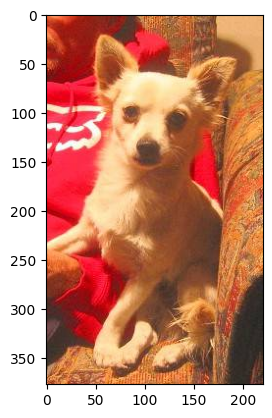

In [25]:
import matplotlib.pyplot as plt

print(test_df['path'][0], test_df['target'][0], test_df['label'][0])
pil_image = Image.open(test_df['path'][0])

plt.imshow(pil_image)

In [26]:
from PIL import Image

print(test_df['path'][0], test_df['target'][0], test_df['label'][0])
pil_image = Image.open(test_df['path'][0])

pil_tensor = transform_02(pil_image)
pil_tensor = pil_tensor.unsqueeze(0)

pred_class = predictor.predict(pil_tensor).item()
print('predicted class:', pred_class)

/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg 0 DOG
predicted class: 0


In [27]:

for i in range(10):
    pil_image = Image.open(test_df['path'][i])
    pil_tensor = transform_02(pil_image).unsqueeze(0)
    pred_class = predictor.predict(pil_tensor).item()
    print('actual class:', test_df['target'][i],'predicted class:', pred_class)

actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
actual class: 0 predicted class: 0
